# CS515/Assignment_06

## TOPIC: Graph Algorithms

## 1.1: Problem Statement
### (a). Connected Components: Write a function connected_components that takes a directed graph as input and outputs the total number of connected components in the graph.¶


Enter the number of edges:  7

Enter edge (source destination):  1 2

Enter edge (source destination):  2 3

Enter edge (source destination):  3 1

Enter edge (source destination):  1 5

Enter edge (source destination):  4 3

Enter edge (source destination):  2 8

Enter edge (source destination):  9 0



The graph is:


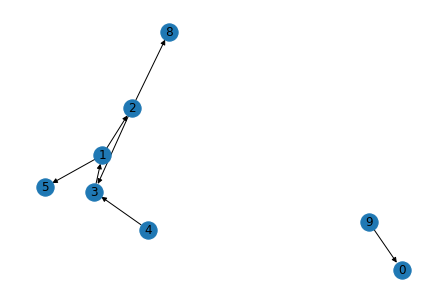


Connected Components:

Component 1: {1, 2, 3, 4, 5, 8}

Component 2: {0, 9}

Total number of connected components: 2


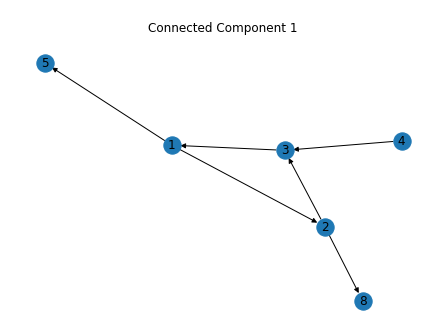

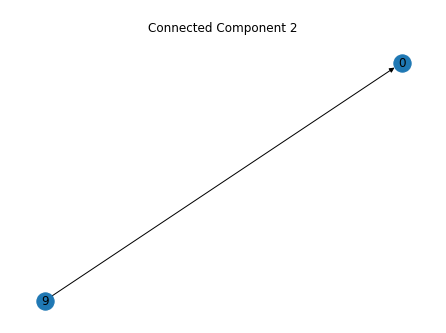

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

def connected_components(graph):
    # Render the graph first
    print('\nThe graph is:')
    render_graph(graph)
    
    # Find all weakly connected components in the graph
    components = list(nx.weakly_connected_components(graph))
    num_components = len(components)
    
    # Print all connected components
    print("\nConnected Components:")
    for idx, component in enumerate(components, 1):
        print(f"\nComponent {idx}: {component}")
    
    # Extract subgraphs for each component
    subgraphs = [graph.subgraph(component) for component in components]
    
    return num_components, subgraphs

# Function to render the graph components
def render_graphs(subgraphs):
    for idx, subgraph in enumerate(subgraphs, 1):
        plt.figure()
        pos = nx.spring_layout(subgraph)  
        nx.draw(subgraph, pos, with_labels=True, arrows=True)
        plt.title(f"\nConnected Component {idx}")
        plt.show()

# Function to render the graph
def render_graph(graph):
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, arrows=True)
    plt.show()

# Function to build the directed graph from user input
def build_graph():
    graph = nx.DiGraph()
    num_edges = int(input("\nEnter the number of edges: "))
    
    for _ in range(num_edges):
        source, destination = map(int, input("\nEnter edge (source destination): ").split())
        graph.add_edge(source, destination)
    
    return graph

if __name__ == '__main__':
    # Build the directed graph
    graph = build_graph()
    
    # Find and print the connected components
    num_components, subgraphs = connected_components(graph)
    print("\nTotal number of connected components:", num_components)
    
    # Render connected components
    render_graphs(subgraphs)

### (b). Connected Components Write a function connect_components that takes 2 directed graph and two nodes from each graph as inputs and returns a single graph that is connected through the provided nodes.


Build the first directed graph:



Enter the number of edges:  5

Enter edge (source destination):  1 0

Enter edge (source destination):  1 2

Enter edge (source destination):  2 1

Enter edge (source destination):  3 2

Enter edge (source destination):  3 1



Build the second directed graph:



Enter the number of edges:  5

Enter edge (source destination):  1 2

Enter edge (source destination):  2 1

Enter edge (source destination):  1 0

Enter edge (source destination):  2 3

Enter edge (source destination):  3 4

Enter the first node from the first graph:  1

Enter the second node from the first graph:  3

Enter the first node from the second graph:  0

Enter the second node from the second graph:  4



The first directed graph is: 



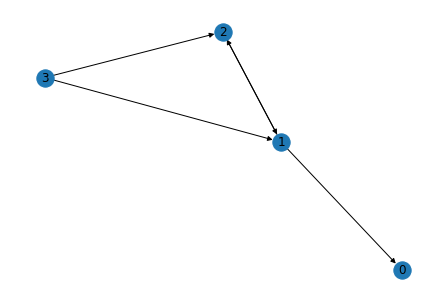


The second directed graph is: 



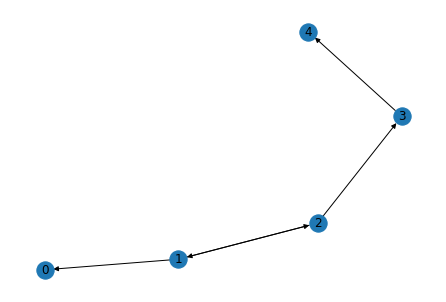


The combined directed graph is: 



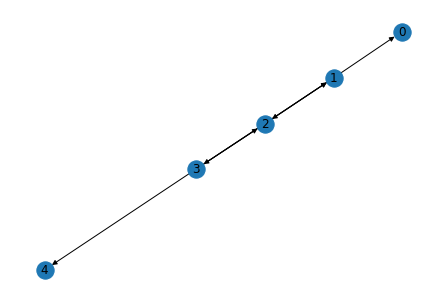

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

# Function to connect the graph components
def connect_components(graph1, node1a, node1b, graph2, node2a, node2b):
    combined_graph = nx.compose(graph1, graph2)
    combined_graph.add_edge(node1a, node2a)
    combined_graph.add_edge(node1b, node2b)
    return combined_graph

# Function to render the graph
def render_graph(graph):
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, arrows=True)
    plt.show()

# Function to build the graph
def build_graph():
    graph = nx.DiGraph()
    num_edges = int(input("\nEnter the number of edges: "))
    
    for _ in range(num_edges):
        source, destination = map(int, input("\nEnter edge (source destination): ").split())
        graph.add_edge(source, destination)
    
    return graph

# Driver Code
if __name__ == '__main__':
    # First directed graph
    print("\nBuild the first directed graph:")
    graph1 = build_graph()

    # Second directed graph
    print("\nBuild the second directed graph:")
    graph2 = build_graph()

    # Nodes to connect from each graph
    node1a = int(input("\nEnter the first node from the first graph: "))
    node1b = int(input("\nEnter the second node from the first graph: "))
    node2a = int(input("\nEnter the first node from the second graph: "))
    node2b = int(input("\nEnter the second node from the second graph: "))

    # Connect the components
    combined_graph = connect_components(graph1, node1a, node1b, graph2, node2a, node2b)

    # Render the combined graph
    print('\nThe first directed graph is: \n')
    render_graph(graph1)
    print('\nThe second directed graph is: \n')
    render_graph(graph2)
    print('\nThe combined directed graph is: \n')
    render_graph(combined_graph)

### (c). Directed Acyclic Graphs Write a function is_dag that takes a directed graph as input and returns True if the graph is a DAG, otherwise returns False.


Enter the number of edges:  6

Enter edge (source destination):  1 0

Enter edge (source destination):  1 2

Enter edge (source destination):  3 1

Enter edge (source destination):  2 4

Enter edge (source destination):  2 5

Enter edge (source destination):  2 6


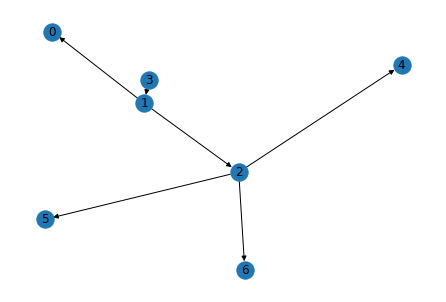


The graph is a Directed Acyclic Graph (DAG).


In [11]:
import networkx as nx
import matplotlib.pyplot as plt

def is_dag(graph):
    try:
        # Attempt to perform topological sorting
        _ = list(nx.topological_sort(graph))
        # If successful, the graph is acyclic
        return True
    except nx.NetworkXUnfeasible:
        # If an exception is raised, the graph contains a cycle
        return False

# Function to render the graph
def render_graph(graph):
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, arrows=True)
    plt.show()
    
# Function to build the directed graph from user input
def build_graph():
    graph = nx.DiGraph()
    num_edges = int(input("\nEnter the number of edges: "))
    
    for _ in range(num_edges):
        source, destination = map(int, input("\nEnter edge (source destination): ").split())
        graph.add_edge(source, destination)
    
    return graph

if __name__ == '__main__':
    # Build the directed graph
    graph = build_graph()

    # Render the graph
    render_graph(graph)
    
    # Check if the graph is a DAG
    if is_dag(graph):
        print("\nThe graph is a Directed Acyclic Graph (DAG).")
    else:
        print("\nThe graph is not a Directed Acyclic Graph (DAG).")


### (d). Shortest Path: Write a function dijktras that takes a directed graph and two nodes a inputs (source and sink) as input and returns the shortest path between source and sink using the Dijktras algorithm.


Enter the number of edges:  7

Enter edge (source destination weight):  1 2 4

Enter edge (source destination weight):  3 1 1

Enter edge (source destination weight):  2 1 4

Enter edge (source destination weight):  2 5 2

Enter edge (source destination weight):  3 0 1

Enter edge (source destination weight):  4 1 2

Enter edge (source destination weight):  7 8 3



The graph is: 



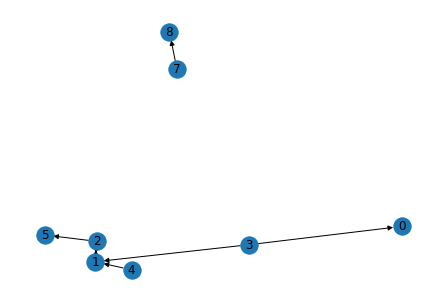


Enter the source node:  2

Enter the sink node:  8



No path found between 2 and 8


In [25]:
import networkx as nx
import matplotlib.pyplot as plt

def dijkstras(graph, source, sink):
    if source not in graph or sink not in graph:
        return None, None
    
    # Check if there's a path between the source and sink nodes
    if not nx.has_path(graph, source, sink):
        return [], 0
    
    # Compute the shortest path using Dijkstra's algorithm
    shortest_path = nx.shortest_path(graph, source=source, target=sink)
    shortest_path_length = nx.shortest_path_length(graph, source=source, target=sink)
    
    return shortest_path, shortest_path_length

# Function to render the graph
def render_graph(graph):
    pos = nx.spring_layout(graph)  
    nx.draw(graph, pos, with_labels=True, arrows=True)
    plt.show()

# Function to build the directed graph from user input
def build_graph():
    graph = nx.DiGraph()
    num_edges = int(input("\nEnter the number of edges: "))
    
    for _ in range(num_edges):
        source, destination, weight = map(int, input("\nEnter edge (source destination weight): ").split())
        if weight < 0:
            print("Edge weight is negative, converting it to positive.")
            weight = abs(weight)
        graph.add_edge(source, destination, weight=weight)
    
    return graph

if __name__ == '__main__':
    # Build the directed graph
    graph = build_graph()

    # Render the graph
    print('\nThe graph is: \n')
    render_graph(graph)
    
    # Input source and sink nodes
    source = int(input("\nEnter the source node: "))
    sink = int(input("\nEnter the sink node: "))
    
    # Find the shortest path
    shortest_path, shortest_path_length = dijkstras(graph, source, sink)
    
    if shortest_path_length != 0:
        print("\nShortest path from", source, "to", sink, ":", shortest_path)
        print("\nShortest path length:", shortest_path_length)
    else:
        print("\nNo path found between", source, "and", sink)